In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
class Element:
    def __init__(self,coordinates,nodes,ID,k,h):
        self.ID = ID
        self.node1 = np.array([coordinates[0,0], coordinates[0,1], nodes[0]])
        self.node2 = np.array([coordinates[1,0], coordinates[1,1], nodes[1]])
        self.node3 = np.array([coordinates[2,0], coordinates[2,1], nodes[2]])
        self.center = np.array([sum(coordinates[:,0])/3, sum(coordinates[:,1])/3])
        x1 = coordinates[0,0]
        x2 = coordinates[1,0]
        x3 = coordinates[2,0]
        y1 = coordinates[0,1]
        y2 = coordinates[1,1]
        y3 = coordinates[2,1]
        self.a1 = x2*y3 - x3*y2
        self.a2 = x3*y1 - x1*y3
        self.a3 = x1*y2 - x2*y1
        self.b1 = y2 - y3
        self.b2 = y3 - y1
        self.b3 = y1 - y2
        self.c1 = x3 - x2
        self.c2 = x1 - x3
        self.c3 = x2 - x1
        self.area = (x1*self.b1 + x2*self.b2 + x3*self.b3)/2
        
        self.H = k*h/(4*self.area)*np.array([[self.b1*self.b1+self.c1*self.c1, self.b1*self.b2+self.c1*self.c2, self.b1*self.b3+self.c1*self.c3], \
                                            [self.b2*self.b1+self.c2*self.c1, self.b2*self.b2+self.c2*self.c2, self.b2*self.b3+self.c2*self.c3], \
                                            [self.b3*self.b1+self.c3*self.c1, self.b3*self.b2+self.c3*self.c2, self.b3*self.b3+self.c3*self.c3]])

In [55]:
class Mesh:
    def __init__(self,elements):
        self.elements = elements
        
    def drawMesh(self):
        for e in self.elements:
            self.drawElement(e)
        
    def drawElement(self,e):
        plt.plot([e.node1[0],e.node2[0]], [e.node1[1],e.node2[1]])
        plt.plot([e.node2[0],e.node3[0]], [e.node2[1],e.node3[1]])
        plt.plot([e.node3[0],e.node1[0]], [e.node3[1],e.node1[1]])
        plt.text(e.center[0],e.center[1],e.ID)

In [56]:
class Triangulation:
    def __init__(self,L,numberElementsX,numberElementsY,k,h):
        self.L = L
        self.numberElementsX = numberElementsX
        self.numberElementsY = numberElementsY
        
    def createTriangulation(self):
        x = self.L/self.numberElementsX
        y = self.L/self.numberElementsY
        elementlist = []
        for j in np.arange(self.numberElementsY):
            for i in np.arange(self.numberElementsX):
                coordLower = np.array([[i*x,j*y],[(i+1)*x,j*y],[i*x,(j+1)*y]])
                nodesLower = np.array([j*(self.numberElementsX+1)+i+1,j*(self.numberElementsX+1)+i+2,(j+1)*(self.numberElementsX+1)+i+1])
                idLower = j*self.numberElementsX*2+i*2+1
                eLower = Element(coordLower, nodesLower, idLower, k, h)
                
                coordUpper = np.array([[i*x,(j+1)*y], [(i+1)*x,j*y], [(i+1)*x,(j+1)*y]])
                nodesUpper = np.array([(j+1)*(self.numberElementsX+1)+i+1, j*(self.numberElementsX+1)+i+2, (j+1)*(self.numberElementsX+1)+i+2])
                idUpper = j*self.numberElementsX*2+i*2+2
                eUpper = Element(coordUpper, nodesUpper, idUpper, k, h)
                
                elementlist.append(eLower)
                elementlist.append(eUpper)
                
        M = Mesh(elementlist)
        return M
                

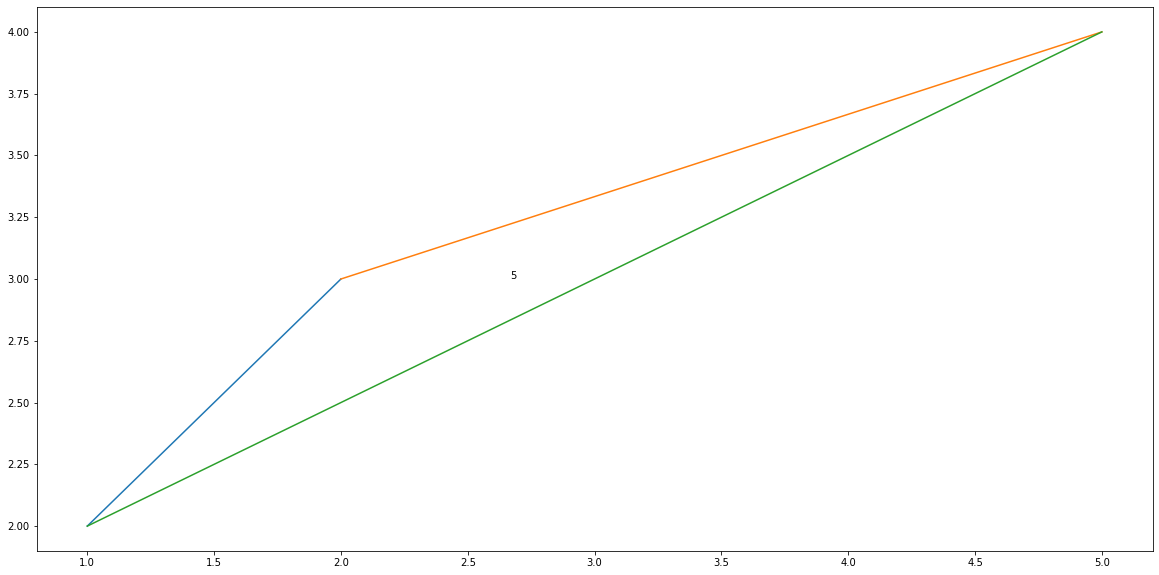

In [57]:
c = np.array([[1,2],[2,3],[5,4]])
nodes = np.array([4,5,6])
e1 = Element(c,nodes,5,273,0.1)
elements = np.array([e1])
M = Mesh(elements)
plt.figure()
M.drawElement(e1)

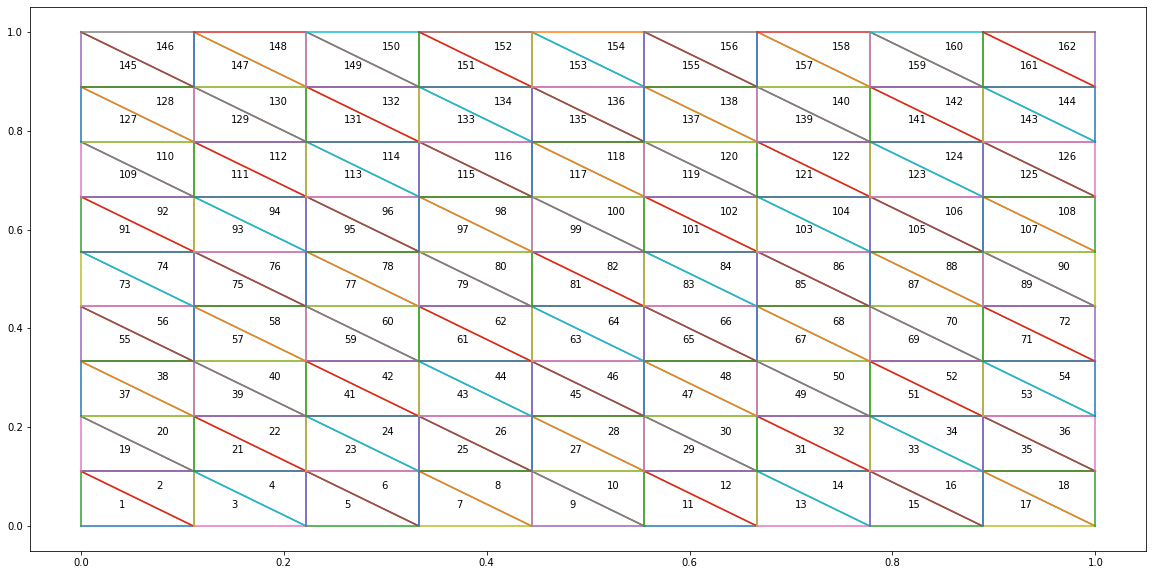

In [43]:
T = Triangulation(1,9,9)
M = T.createTriangulation()
M.drawMesh()
plt.rcParams['figure.figsize'] = [20, 10]

In [ ]:
c = np.array([[1,2],[2,3],[3,4]])
nodes = np.array([4,5,6])
e1 = Element(c,nodes,5)
elements = np.array([e1])
M = mesh(elements)
plt.figure()
M.drawElement(e1)

In [26]:
a = np.array([[1,2],[3,4],[2,5]])
a[:,1]

array([2, 4, 5])

In [58]:
e1.H

array([[ -68.25,   95.55,  -27.3 ],
       [  95.55, -136.5 ,   40.95],
       [ -27.3 ,   40.95,  -13.65]])